In [3]:
!git clone https://github.com/rslim087a/track

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 16.76 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [4]:
!ls track

driving_log.csv  IMG


In [5]:
!pip3 install imgaug #supports augmentation techniques

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa #supports augmentation techniques
import cv2
import pandas as pd
import ntpath
import random

In [7]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'] #specifying the names of the columns
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1) #in order to get the full text of the data table
data.head() #to view first 5 rows of the frame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

In [8]:
def path_leaf(path):
  head, tail = ntpath.split(path) #in order to split the text in the above table 
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


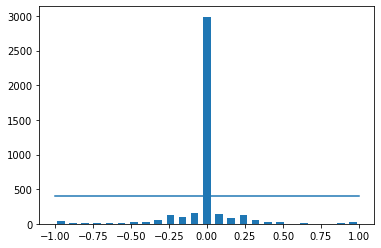

In [9]:
num_bins = 25
samples_per_bin = 400 #setting a threshold for all  the bins 
hist, bins = np.histogram(data['steering'], num_bins) #dividing the steering data into 25 bins
center = (bins[:-1]+ bins[1:]) * 0.5 #slicing is done in order to make the histogram center at zero
             #till second last value
print(bins)
plt.bar(center, hist, width=0.05)  #vertical axis specifies frequency of steering angle during each simulation
     #steering angle values , histo values
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
         #first horizontal x value  , rightmost x value    ,    corresponding y values

total data: 4053
removed: 2590
remaining: 1463


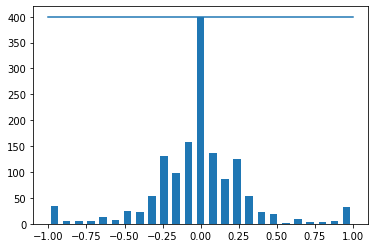

In [10]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins): #looping through every bin
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
           #example value of -0.97 will belong to the first bin and not the second bin
      list_.append(i) #this list will consist of all the steering angle for a specific bin
  list_ = shuffle(list_) #shuffle will lead to preserving some values of the track and mix up the steering angle for all parts of the track
  list_ = list_[samples_per_bin:] #isolate the values that go beyond the threshold
  remove_list.extend(list_) #the unremoved part of list is stored in data
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
  #removing those rows whose data has been removed from the index
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [11]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i] #helps to perform selection on a row of dats , taking specific index into consideration
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append  append means adding that item to the list
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)#asarray  to convert inputs into arrays
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0.0                               
speed       1.434013                          
Name: 12, dtype: object


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3511
Valid Samples: 878


Text(0.5, 1.0, 'Validation set')

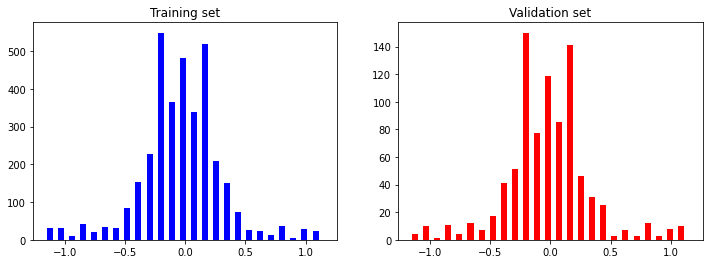

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
         #steering angle
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [14]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3)) #image aug augmenters , zoom till 30%
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

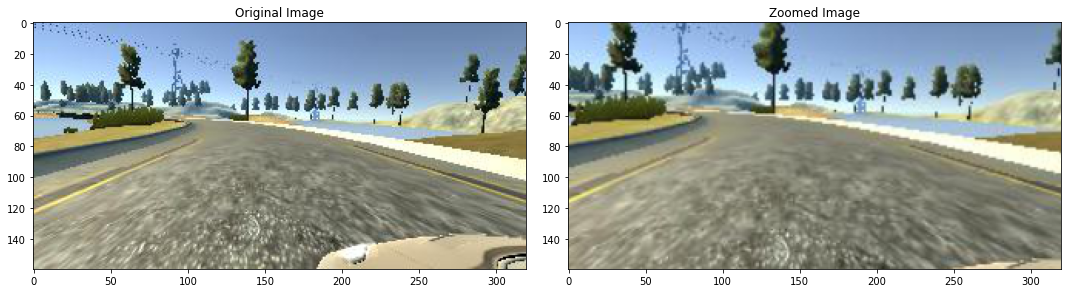

In [15]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
                     #1 row , 2 columns
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')


In [16]:
def pan(image): #panning is horizontal or vertical translation of image
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)}) #setting range between -10 and 10 percent for image to translate up down left right
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

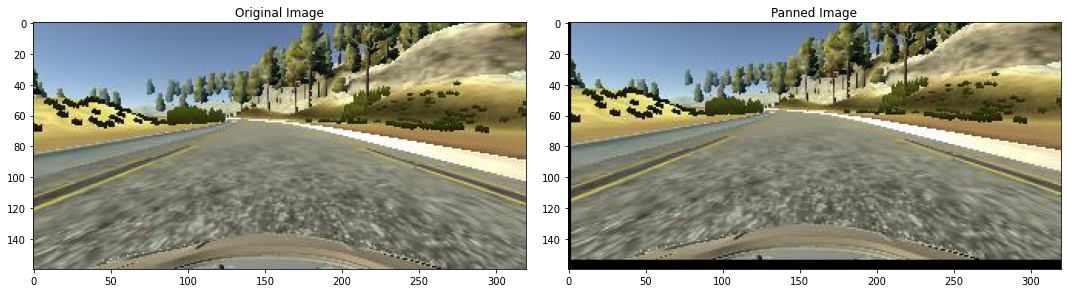

In [17]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [18]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2)) #image darker for value to be multiplied less than 1 and brighter for greater than 1
    image = brightness.augment_image(image) #model performs better for darker image
    return image

Text(0.5, 1.0, 'Brightness altered image ')

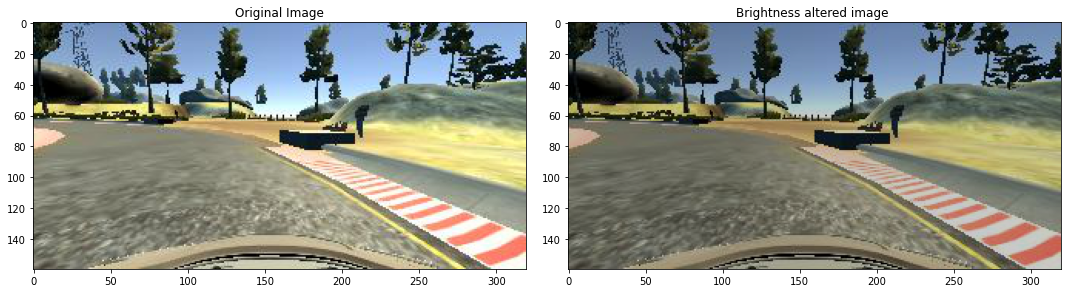

In [19]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')


In [20]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1) #0 for vertical flip , 1 for horiz flip , -1 for combo of 0 and 1
    steering_angle = -steering_angle # as the image is flipped horizontally
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.15')

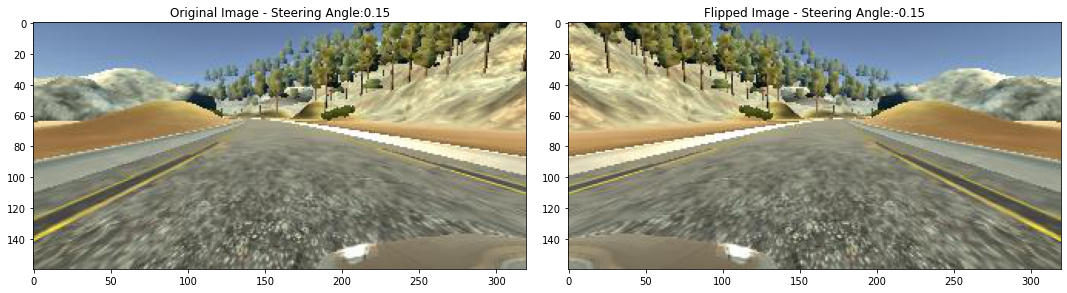

In [21]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [22]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image) #applying the augmentation techniques to 50% of the data
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

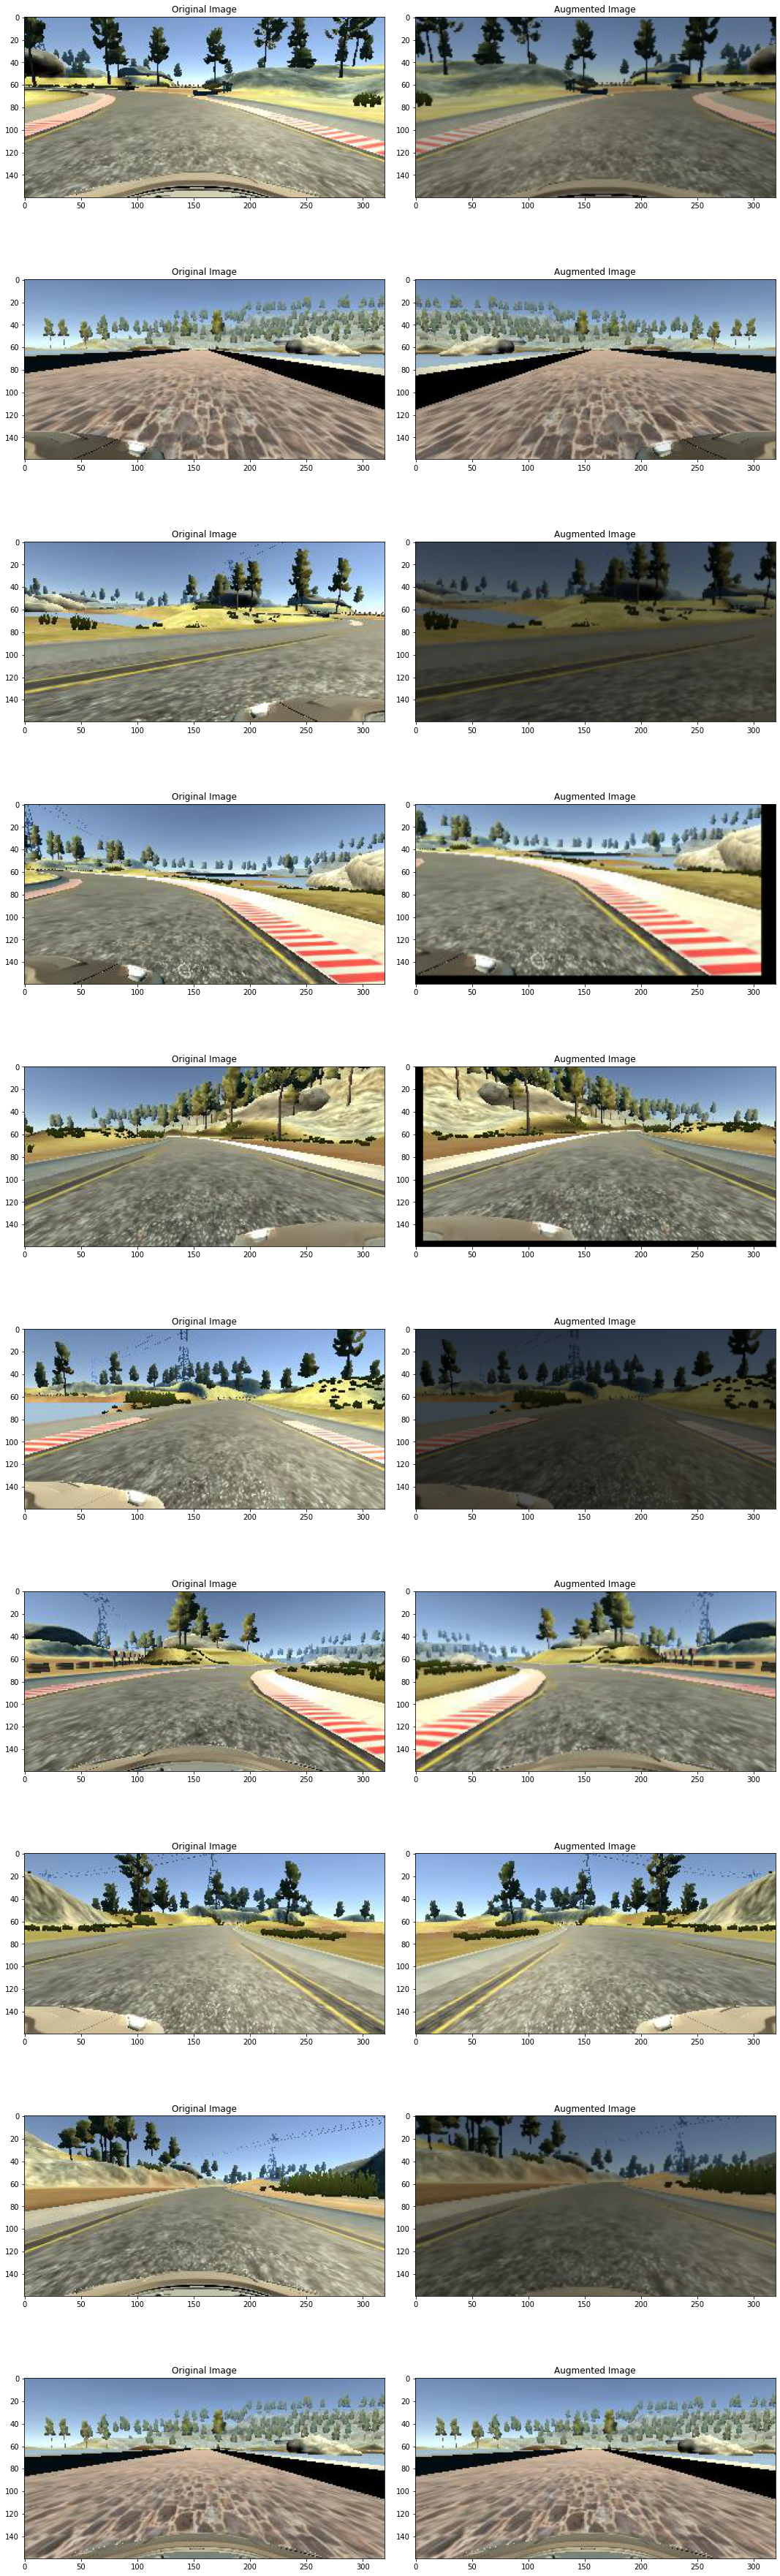

In [23]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")
 

In [24]:
def img_preprocess(img):
    img = img[60:135,:,:] #slicing the height and leaving width and channels at same value
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) #Y is for brightness , U and V provide color information
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255 #normalization of image
    return img

Text(0.5, 1.0, 'Preprocessed Image')

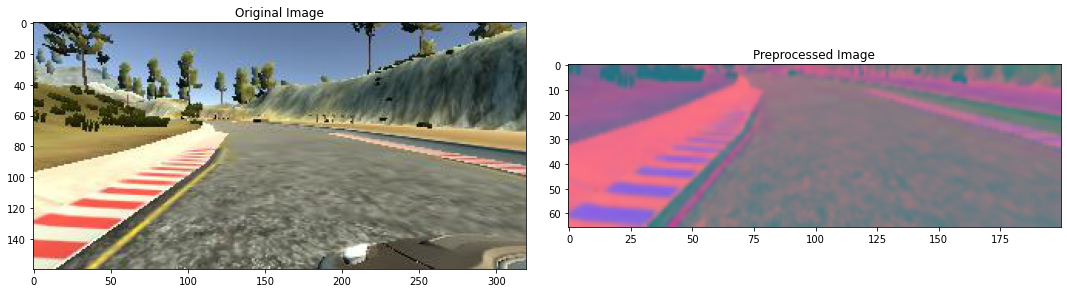

In [25]:
image = image_paths[100]
original_image = mpimg.imread(image) #storing the image by using the image path
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [26]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
                                                           #boolean function true for training data and false for validation
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation Image')

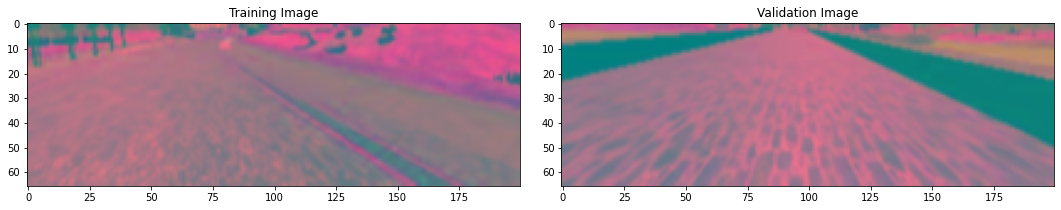

In [27]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [28]:
def nvidia_model():
 
  model = Sequential()
     #all the inputs of the nvidia model are pre defined
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))
          #24 filters is specific to nvidia model  #kernel will 2 pixels each time for faster computation
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Dropout(0.5))
  
  #removing dropout layers will decrease the validation losses
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))  #use 'elu' function for better output , less loss
  model.add(Dropout(0.5))
  
  
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation ='elu'))
  model.add(Dense(1))
  
  
  optimizer= Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
                    #mean square error
  return model

In [29]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 252,219
Trainable params: 252,219
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1), # 1 as there is training data
                                  steps_per_epoch=300,         #batch size is 100 that is our generator produces 100 images in every set
                                  epochs=10, # 100 images will be augmented 300 times
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0), #0 is for validation data
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 229s 714ms/step - loss: 0.0966 - val_loss: 0.0640
Epoch 2/10
300/300 [==============================] - 206s 690ms/step - loss: 0.0678 - val_loss: 0.0650
Epoch 3/10
300/300 [==============================] - 204s 683ms/step - loss: 0.0645 - val_loss: 0.0436
Epoch 4/10
300/300 [==============================] - 203s 677ms/step - loss: 0.0610 - val_loss: 0.0403
Epoch 5/10
300/300 [==============================] - 219s 732ms/step - loss: 0.0618 - val_loss: 0.0361
Epoch 6/10
300/300 [==============================] - 206s 690ms/step - loss: 0.0601 - val_loss: 0.0341
Epoch 7/10
300/300 [==============================] - 205s 687ms/step - loss: 0.0583 - val_loss: 0.0377
Epoch 8/10
300/300 [==============================] - 204s 681ms/step - loss: 0.0544 - val_loss: 0.0361
Epoch 9/10
300/300 [==============================] - 207s 691ms/step - loss: 0.0567 - val_loss: 0.0391
Epoch 10/10
300/300 [==============================] - 204s 683m

Text(0.5, 0, 'Epoch')

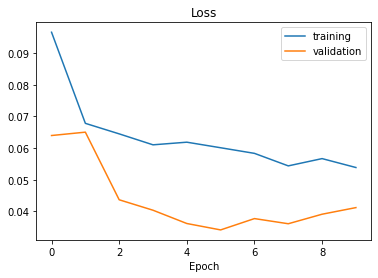

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')